## Eric Maxwell
## CSC 570 Data Science
## Midterm 
<hr style="height:5px">

### Import Functions and Create Training/Test sets

In [2]:
#Import functions
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from IPython.display import display, HTML
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.grid_search import GridSearchCV

%pylab inline

#Create training and testing data frames
X = pd.read_csv("midterm_train.csv")
X_test = pd.read_csv("midterm_test.csv")

C:\Users\eek00\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\eek00\Anaconda3\lib\site-packages\sklearn\grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


Populating the interactive namespace from numpy and matplotlib


<hr style="height:3px">
### EDA and Data Prep

#### Overview
+ The training set has 160,000 observations, one hundred independent variables and one dependent variable.
+ The test set has 40,000 observations and one hundred independent variables.

In [3]:
print(X.shape)
print(X_test.shape)

(160000, 101)
(40000, 100)


#### Create printall function which will diplay all columns of a data set

In [4]:
# Fucntion which displays all variables.
def printall(X, max_rows=10):
    from IPython.display import display, HTML
    display(HTML(X.to_html(max_rows=max_rows)))

#### Display all attributes of training data set

In [5]:
printall(X)

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,x39,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49,x50,x51,x52,x53,x54,x55,x56,x57,x58,x59,x60,x61,x62,x63,x64,x65,x66,x67,x68,x69,x70,x71,x72,x73,x74,x75,x76,x77,x78,x79,x80,x81,x82,x83,x84,x85,x86,x87,x88,x89,x90,x91,x92,x93,x94,x95,x96,x97,x98,x99,y
0,1.995229,1.788078,0.427321,5.516276,-7.303279,4.333247,-2.163782,-1.698103,16.317195,July,-5.252962,19.865234,3.095630,-11.737767,-1.812181,-2.670336,0.530303,5.322231,1.571383,1.280015,28.518345,7.838117,6.907220,-3.793471,-3.129521,6.388537,1.933956,-0.616690,1.114462,-10.511699,8.470415,-17.125572,-1.629352,-1.304302,-0.811353,-1.461163,-52.164515,-128.708759,4.517467,61.727692,39.585315,8.632843,-1.539473,39.279555,7.856023,58.025773,wednesday,-2.039346,asia,3.798755,-13.961991,-5.488145,4.027504,-0.296617,-0.663671,-1.242851,-180.439109,1.200852,15.736506,2.057282,-0.0%,-4.276429,-0.575574,-56.149082,0.053255,2.587119,15.019216,-15.447892,6.138344,24.561812,9.683107,1.264512,-11.452049,-2.017215,42.532467,21.865403,14.613451,$1816.2,-7.071309,-11.834831,8.627951,0.386928,-1.481465,2.143634,-7.218197,-3.131237,2.431785,0.057312,-7.911398,-3.388055,2.704413,5.051982,-4.557742,5.228120,-0.830699,-5.257952,2.058820,2.561103,-9.300450,1.660624,0
1,2.550962,-1.652971,1.014979,1.769840,-5.787771,1.697927,0.031055,2.295134,-8.243895,Jun,1.420109,1.290628,-2.305676,9.708170,7.530631,-6.834708,0.888644,8.573946,3.865781,1.645028,14.334175,9.990140,5.208484,-2.435278,4.686451,2.409618,-0.275981,-2.540761,-3.140622,-5.372044,-4.720133,-0.139099,-1.543651,1.728676,5.421892,1.164771,-32.456665,-157.030570,-12.080095,-0.317248,9.434764,4.689921,-8.682799,18.656073,-3.188643,22.032431,thurday,-3.719551,asia,4.138179,-2.359743,-0.709823,5.693613,-6.015889,12.416650,-0.069345,-118.782877,0.423200,39.318644,2.679853,0.01%,24.706221,0.500198,-29.504832,1.509419,6.875048,16.174459,3.316774,2.951170,4.082843,4.067156,1.807541,-0.582318,-5.694232,-6.593155,21.170521,8.800767,$314.56,-8.237864,-10.372540,2.554775,3.171940,0.050058,0.330439,7.312924,-2.864582,3.864075,-0.102467,23.609068,-1.996757,-0.110601,5.551093,-1.761302,7.030544,-0.724838,9.439360,1.091741,1.712046,-6.176244,-0.159665,0
2,4.520158,1.705834,-0.483402,-16.423634,-2.078275,2.862478,-2.018185,0.512500,0.529130,July,-0.787666,-5.140563,-1.682044,10.360118,3.679271,-3.975230,1.065796,6.651533,0.688284,-1.167851,-0.003845,1.842578,-4.906243,1.695608,-2.881383,4.770150,0.404277,1.200014,5.585844,11.747654,-58.574287,2.308265,2.716236,-6.401233,-9.023721,1.089488,-25.651437,-29.069620,2.820144,48.379787,72.736044,-3.388579,1.538691,30.395616,10.700859,-22.716874,wednesday,3.611869,asia,-7.116901,-0.626245,10.122517,5.689329,-10.799897,-1.556081,-0.615802,155.007958,2.330721,11.810336,-1.275248,0.0%,3.873807,0.228113,-15.214549,-2.400859,-3.124439,48.843258,3.939946,-1.278123,27.181511,6.428769,0.675298,-2.390642,4.152516,-3.269133,3.062709,-8.401725,$-968.37,9.186224,-13.898305,5.685756,-4.574071,1.923154,0.550571,-7.078989,2.942603,4.115086,-0.060855,32.276572,2.082138,-1.420448,5.459993,-2.327336,9.939302,7.098298,-3.644457,8.040217,-8.129974,3.452164,4.965949,1
3,3.771350,6.073115,-0.742745,1.919359,-5.110530,-3.494936,0.454010,1.627312,-18.101522,May,0.483357,10.716608,2.241789,2.349236,-6.544005,10.283348,0.449957,4.019176,-2.520090,-0.078659,22.092955,2.975220,-11.335790,0.875090,16.045997,1.100616,-0.592550,0.078436,21.142648,-16.632834,16.420462,-4.063119,-0.431313,2.213888,0.302884,1.402579,5.993833,-44.650283,-0.079029,44.533267,-10.313114,-6.594032,-5.203220,12.521997,-5.419383,-73.043951,wednesday,4.968702,asia,-2.012349,-31.239537,-3.054172,5.666152,8.386656,8.348462,-0.477953,-15.791628,-1.701398,45.159498,-0.273327,0.01%,11.395441,0.390383,3.108763,0.929644,-0.387760,1.854621,25.543005,3.620885,4.267970,-5.515257,0.009787,-10.950085,2.944241,21.879028,21.418446,2.590778,$-281.38,-

#### Display continuous data stats

In [6]:
printall(X.describe())

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,x39,x40,x41,x42,x43,x44,x45,x47,x49,x50,x51,x52,x53,x54,x55,x56,x57,x58,x59,x61,x62,x63,x64,x65,x66,x67,x68,x69,x70,x71,x72,x73,x74,x75,x76,x78,x79,x80,x81,x82,x83,x84,x85,x86,x87,x88,x89,x90,x91,x92,x93,x94,x95,x96,x97,x98,x99,y
count,159981.000000,159984.000000,159983.000000,159980.000000,159986.000000,159988.000000,159980.000000,159987.000000,159991.000000,159979.000000,159985.000000,159985.000000,159976.000000,159982.000000,159979.000000,159989.000000,159988.000000,159980.000000,159982.000000,159975.000000,159986.000000,159986.000000,159981.000000,159981.000000,159989.000000,159986.000000,159987.000000,159984.000000,159977.000000,159979.000000,159982.000000,159981.000000,159988.000000,159985.000000,159983.000000,159986.000000,159987.000000,159983.000000,159989.000000,159984.000000,159980.000000,159984.000000,159981.000000,159982.000000,159989.000000,159983.000000,159980.000000,159989.000000,159979.000000,159988.000000,159984.000000,159987.000000,159981.000000,159991.000000,159984.000000,159989.000000,159982.000000,159982.000000,159984.000000,159983.000000,159987.000000,159989.000000,159989.000000,159982.000000,159989.000000,159983.000000,159987.000000,159992.000000,159991.000000,159989.000000,159985.000000,159985.000000,159982.000000,159984.000000,159983.000000,159986.000000,159983.000000,159986.000000,159992.000000,159981.000000,159988.000000,159989.000000,159988.000000,159982.000000,159990.000000,159987.000000,159985.000000,159984.000000,159980.000000,159982.000000,159981.000000,159987.000000,159978.000000,159987.000000,159975.000000,160000.000000
mean,0.009261,-0.007223,-0.000507,0.015749,-0.001798,0.009769,-0.027185,0.008479,-2.415846,0.000733,-0.029449,-0.008051,0.048223,0.028623,0.017232,0.120600,-0.008113,-0.006587,-0.007337,3.598811,0.012839,0.009211,-0.178150,-0.021365,0.001741,-0.003345,0.003505,-0.009173,0.031929,5.327107,0.015373,0.002242,0.000037,0.025626,0.002884,2.313586,10.880691,0.003479,0.115416,22.683158,-3.614463,0.018081,-4.917921,-0.003734,-3.320774,-0.020863,-0.001063,0.839385,0.017782,0.008333,-1.664148,0.013984,0.001325,0.880049,0.005703,7.541944,0.002799,-0.009508,0.050224,-3.478390,0.003666,0.000846,3.263540,-0.003449,0.017835,2.506629,-0.023720,0.001093,0.014564,-0.000872,-0.064344,2.727818,0.050517,-0.006149,-0.038392,-1.632128,0.011332,-0.002731,-0.002745,-0.046132,0.008695,0.000653,0.000549,2.785193,0.681610,0.003215,-0.028914,-0.008523,0.019936,0.002212,0.002705,-0.001674,0.034681,-0.011464,0.923695,0.400781
std,5.338891,3.707944,5.005461,7.270931,3.355563,2.315157,4.959242,1.534470,13.316416,2.686618,6.340768,8.441317,10.004423,4.740423,6.157044,0.961047,9.716206,4.315218,3.189371,29.239350,7.278140,6.652077,0.976913,7.732425,7.281792,2.123847,1.896012,8.317289,8.470296,30.737333,5.839082,2.014827,7.069233,6.823598,0.982656,18.578869,94.930069,5.757837,26.163340,66.398067,19.605824,6.568459,26.705973,7.374804,25.940361,4.864739,4.400005,14.324501,7.273383,8.359512,13.189247,5.491977,0.392166,88.214602,2.323723,23.196231,1.543086,9.507885,0.759566,18.827228,1.726099,4.022199,26.729070,9.638544,7.733120,19.810404,8.789168,1.413753,7.685545,3.485743,24.132055,15.333449,17.902361,8.625682,8.771185,9.192884,8.253632,3.492597,1.177052,8.363165,3.924591,3.413494,0.175712,23.544012,2.236075,1.123133,6.915585,4.733332,9.545692,4.663293,9.500001,4.357044,8.763774,5.838035,2.904734,0.490058
min,-24.645209,-17.943278,-24.757139,-32.269321,-15.689236,-10.308264,-22.146263,-7.841160,-57.356416,-11.779618,-27.956748,-36.944235,-44.156772,-20.005634,-28.763290,-4.594740,-40.416183,-19.349741,-13.320680,-134.763033,-31.856616,-30.429650,-4.267668,-34.504947,-32.315257,-10.089273,-7.840841,-35.955243,-38.305165,-141.707466,-24.546704,-8.755016,-34.077342,-28.399657,-4.684578,-82.197002,-416.752873,-25.237476,-121.208315,-273.480639,-87.647850,-28.708098,-128.993565,-

#### Display categorical data stats

In [7]:
display(HTML(X[X.columns[X.dtypes == "object"]].describe().to_html()))

,x9,x46,x48,x60,x77
count,159983,159985,159979,159987,159983
unique,12,5,3,11,129375
top,Jun,wednesday,asia,0.01%,$246.63
freq,44010,96758,140972,38765,6


<hr style="height:1px">
### Baseline Accuracy
+ Predict all observations did not cancel. 
+ Set all y_hat equal to 0.
+ This is the most common outcome.

In [8]:
#Baseline Accuracy
print("Baseline Accuracy: ",round(accuracy_score(X.y, np.zeros(X.shape[0]))*100,1))
print("Baseline AUC: ",roc_auc_score(X.y, np.zeros(X.shape[0])))

Baseline Accuracy:  59.9
Baseline AUC:  0.5


<hr style="height:1px">
### Drop observations with missing attributes
+ With 160,000 observations, there will be plenty of data to train with if observations with missing attributes are dropped.
+ Check percentage of people who cancelled subscriptions before and after droping observations.

In [9]:
#Check percentage of cancelations for training data before dropping attributes.
print(X.y.value_counts())
print("Cancellation rate before dropping observations:",round(len(X[X.y==1])/len(X)*100,1),"%")

0    95875
1    64125
Name: y, dtype: int64
Cancellation rate before dropping observations: 40.1 %


+ There is a 40.1% cancellation rate with all observations included.
+ Drop observations with missing attributes.

In [10]:
#Drop observations with missing attributes.
X.dropna(axis=0, inplace=True)

+ Check percentage of cancellations for data set after removing observations with missing attributes.

In [11]:
#Check percentage of cancelations for training data after dropping attributes.
print(X.y.value_counts())
print("Cancellation rate after dropping observations:", round(len(X[X.y==1])/len(X)*100,1),"%")

0    94928
1    63503
Name: y, dtype: int64
Cancellation rate after dropping observations: 40.1 %


+ The cancellation rate is 40.1% after dropping observations.
+ The cancelation rate did not change after dropping observations. 
+ There were 1569 observations removed, 947 0's and 622 1's.This is 0.98% of the training data.
+ The cancellation rate of removed observations is 39.6%. 
+ The fact that the cancellation rate did not change and the dropped observations cancellation rate is very close to the overall cancellation rate, indicates that there is not a correlation between missing attributes and cancellations.
+ The training data will not include observations with missing attributes moving forward.

<hr style="height:3px">
### Categorical Data 
+ Categorical variables will be mapped as opposed to creating dummies.
+ There should be enough information to split the variables at the tree nodes and this keeps the information in one variable.
+ After testing both methods, mapping seemed to generate slightly better resutls with cross-validation when compared to dummies.
+ There should be no missing values since all observations with missing values were dropped from the data set

<hr style="height:1px">
### x9 Attribute
+ This categorical variable is made up of the months of the year.
+ Jun (June) is the mode.

In [12]:
#View value counts.
print(X['x9'].value_counts())

Jun        43565
July       40988
May        27887
Aug        23223
Apr        10539
sept.       7691
Mar         2361
Oct         1604
Feb          326
Nov          207
January       23
Dec           17
Name: x9, dtype: int64


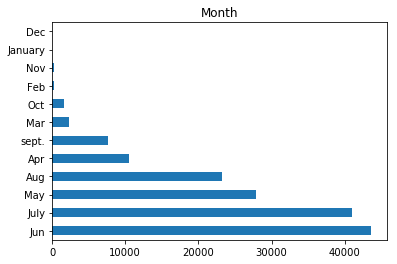

In [13]:
#Display variable bar graph.
X['x9'].value_counts().plot(kind='barh', title='Month')

In [14]:
#Map values to numerical values.
X['x9'] = X['x9'].map({'January':0, 'Feb':1, 'Mar':2, 'Apr':3, 'May':4, 'Jun':5, 'July':6, 'Aug':7, 'sept.':8, 'Oct':9, 'Nov':10, 'Dec':11})

<hr style="height:1px">
### x46 Attribute
+ This categorical attribute is make up of weekdays
+ Wednesday is the mode.

In [15]:
#Display value counts.
print(X.x46.value_counts())

wednesday    95855
thurday      31112
tuesday      29891
friday         892
monday         681
Name: x46, dtype: int64


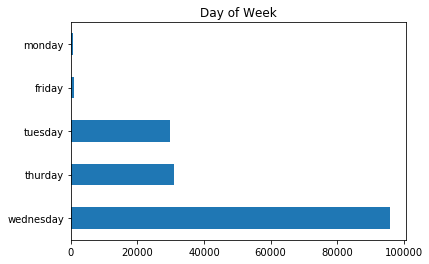

In [16]:
#Create bar graph.
X.x46.value_counts().plot(kind='barh', title='Day of Week')

In [17]:
#Map to numerical.
X['x46'] = X['x46'].map({'monday':0, 'tuesday':1, 'wednesday':2, 'thurday':3, 'friday':4})

<hr style="height:1px">
### x48 Attribute
+ This categorical attribute is made up of the continents asia, america, and europe.
+ Asia is the mode.

In [18]:
#Value counts
print(X['x48'].value_counts())

asia       139599
america      9742
euorpe       9090
Name: x48, dtype: int64


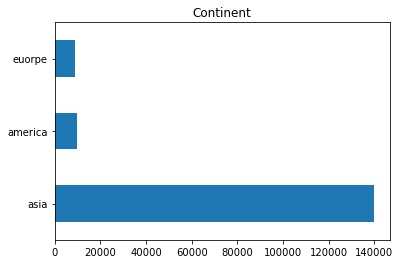

In [19]:
#Bar graph
X['x48'].value_counts().plot(kind='barh', title='Continent')

In [20]:
#Map to numeric.
X['x48'] = X['x48'].map({'euorpe':0, 'asia':1, 'america':2})

<hr style="height:1px">
### x60 Attribute
+ This variable was registered as categorical beacuse of the % sign.
+ The % sign will be dropped and the data will be cast to a float. 
+ The mode is 0.01%

In [21]:
#Get value counts.
print(X.x60.value_counts())

0.01%     38366
-0.01%    38294
-0.0%     30485
0.0%      30098
-0.02%     9734
0.02%      9466
0.03%      1008
-0.03%      907
-0.04%       42
0.04%        30
0.05%         1
Name: x60, dtype: int64


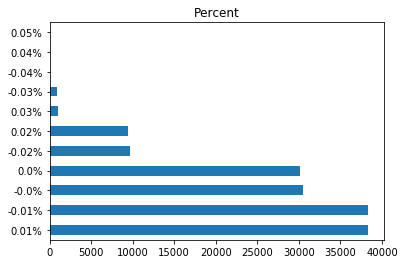

In [22]:
#Create Bar Graph.
X.x60.value_counts().plot(kind='barh', title='Percent')

In [23]:
X['x60'] = X['x60'].replace('[\%,]', '', regex=True).astype(float)

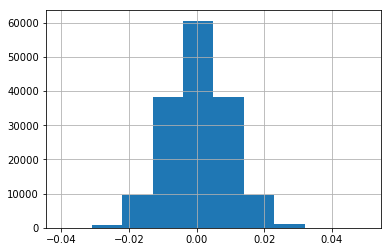

In [46]:
#Create Histogram.
X.x60.hist(bins=10)

<hr style="height:1px">
### x77 Attribute
+ This variable was registered as categorical attribute becuase of the dollar sign. 
+ It is a continuous variable upon further inspection.
+ The dollar sign will be dropped and it will be cast to a float.


In [25]:
#Display value counts.
print(X.x77.value_counts())

$246.63      6
$-347.4      6
$-368.85     6
$-169.24     6
$111.32      6
$409.13      5
$248.46      5
$-269.13     5
$-256.29     5
$187.39      5
$-236.92     5
$-122.74     5
$311.24      5
$709.69      5
$-182.31     5
$-733.88     5
$156.98      5
$1055.08     5
$-365.15     5
$487.27      5
$900.42      5
$28.11       5
$-165.62     5
$-388.78     5
$135.32      5
$-320.72     5
$-123.72     5
$39.18       5
$-71.68      5
$-152.52     5
            ..
$-814.34     1
$-1878.22    1
$1224.04     1
$-1134.91    1
$-779.26     1
$-1606.35    1
$30.84       1
$-1092.88    1
$-215.12     1
$-1796.6     1
$845.82      1
$750.98      1
$1131.21     1
$369.09      1
$1046.36     1
$-99.66      1
$105.19      1
$877.51      1
$-1243.96    1
$1526.53     1
$135.85      1
$-1631.62    1
$-708.82     1
$651.56      1
$36.44       1
$84.22       1
$-347.2      1
$-501.85     1
$380.8       1
$2115.88     1
Name: x77, Length: 128362, dtype: int64


In [26]:
#Drop $ sign and cast to float.
X['x77'] = X['x77'].replace('[\$,]', '', regex=True).astype(float)

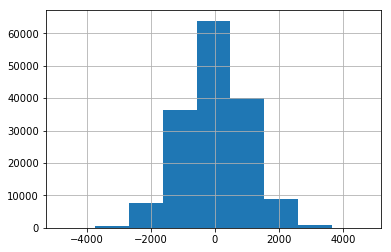

In [27]:
#Display histogram.
X.x77.hist(bins = 9)

<hr style="height:1px">
### Display continuous varible stats
+ Histograms for continuous variables are not included as there are 95 of them.
+ They were all viewed and appear to have relatively normal distributions.

In [28]:
printall(X.describe())

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,x39,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49,x50,x51,x52,x53,x54,x55,x56,x57,x58,x59,x60,x61,x62,x63,x64,x65,x66,x67,x68,x69,x70,x71,x72,x73,x74,x75,x76,x77,x78,x79,x80,x81,x82,x83,x84,x85,x86,x87,x88,x89,x90,x91,x92,x93,x94,x95,x96,x97,x98,x99,y
count,158431.000000,158431.000000,158431.000000,158431.000000,158431.000000,158431.000000,158431.000000,158431.000000,158431.000000,158431.000000,158431.000000,158431.000000,158431.000000,158431.000000,158431.000000,158431.000000,158431.000000,158431.000000,158431.000000,158431.000000,158431.000000,158431.000000,158431.000000,158431.000000,158431.000000,158431.000000,158431.000000,158431.000000,158431.000000,158431.000000,158431.000000,158431.000000,158431.000000,158431.000000,158431.000000,158431.000000,158431.000000,158431.000000,158431.000000,158431.000000,158431.000000,158431.000000,158431.000000,158431.000000,158431.000000,158431.000000,158431.000000,158431.000000,158431.000000,158431.000000,158431.000000,158431.000000,158431.000000,158431.000000,158431.000000,158431.000000,158431.000000,158431.000000,158431.000000,158431.000000,158431.000000,158431.000000,158431.000000,158431.000000,158431.000000,158431.000000,158431.000000,158431.000000,158431.000000,158431.000000,158431.000000,158431.000000,158431.000000,158431.000000,158431.000000,158431.000000,158431.000000,158431.000000,158431.000000,158431.000000,158431.000000,158431.000000,158431.000000,158431.000000,158431.000000,158431.000000,158431.000000,158431.000000,158431.000000,158431.000000,158431.000000,158431.000000,158431.000000,158431.000000,158431.000000,158431.000000,158431.000000,158431.000000,158431.000000,158431.000000,158431.000000
mean,0.009496,-0.007282,-0.000260,0.018251,-0.000685,0.008909,-0.024633,0.008558,-2.409598,5.382457,0.001104,-0.032097,-0.008956,0.048322,0.029362,0.018454,0.121099,-0.006773,-0.008579,-0.007850,3.592069,0.011577,0.009522,-0.178067,-0.026262,0.002779,-0.003273,0.003109,-0.006871,0.034037,5.332662,0.015420,0.002237,-0.000689,0.023322,0.003053,2.321603,10.858155,0.004484,0.107227,22.715407,-3.617665,0.015677,-4.924904,-0.003773,-3.315221,2.010370,-0.021740,1.004115,0.001062,0.835950,0.016859,0.010213,-1.666346,0.015353,0.001334,0.866833,0.005497,7.553317,0.002573,-0.000013,-0.010787,0.050123,-3.471663,0.003612,0.004494,3.276944,-0.004464,0.018098,2.513766,-0.022233,0.000839,0.015788,-0.000259,-0.070964,2.729846,0.054234,0.104458,-0.004549,-0.039051,-1.631624,0.009178,-0.003089,-0.003312,-0.045404,0.010441,0.001032,0.000551,2.781860,0.682009,0.003290,-0.027538,-0.008928,0.020936,0.002402,-0.000842,0.001169,0.039102,-0.012010,0.923154,0.400824
std,5.337038,3.707988,5.005463,7.270338,3.355918,2.315635,4.958907,1.534165,13.311633,1.395339,2.687763,6.340381,8.441212,10.005055,4.741482,6.157431,0.961191,9.716015,4.315815,3.187607,29.232076,7.276637,6.651784,0.976925,7.733792,7.283027,2.123930,1.895642,8.316825,8.470142,30.722953,5.838938,2.014232,7.069061,6.821975,0.982456,18.578689,94.938956,5.754619,26.162199,66.396566,19.603316,6.568477,26.702265,7.374518,25.943320,0.651655,4.864049,0.344745,4.400018,14.321572,7.272395,8.361776,13.185039,5.491391,0.392138,88.219477,2.323953,23.199452,1.543212,0.010416,9.507757,0.759628,18.823470,1.726060,4.022918,26.738032,9.636877,7.731552,19.812313,8.791169,1.413962,7.686997,3.484813,24.132904,15.328442,17.899110,999.406087,8.628603,8.769160,9.192788,8.253040,3.492838,1.177095,8.362393,3.924633,3.413595,0.175711,23.540871,2.235687,1.123075,6.916402,4.732611,9.542794,4.663823,9.500362,4.357820,8.761336,5.836813,2.904531,0.490067
min,-24.645209,-17.943278,-24.757139,-32.269321,-15.689236,-10.308264,-22.146263,-7.841160,-57.356416,0.000000,-11.779618,-27.956748,-36.944235,-44.156772,-20.005634,-28.763290,-4.594740,-40.416183,-19.349741,-13.320680,-134.763033,-31.856616,-30.429650,-4.267668,-34.504947,-32.315257,-10.089273

<hr style="height:1px">
### Create dependent variable for training set

In [29]:
y = X.pop('y')

<hr style="height:3px">
### Create Random Forest Regressor
+ Random Forest Regressors and Random Forest Classifiers were both implemented and tested on the test set and scored on Kaggle.
+ The Regression model did much better on the testing data when submitted to kaggle.
+ Only the regression model will be implemented here to simplify this project.

<hr style="height:1px">
#### RFR classifier initial implementation
+ Set n_jobs to use all processor cores.
+ Set random state to 42 so results can be reproduced.
+ Set number of estimators to 100.
+ Get AUC score using 3-Fold cross-validation.

In [30]:
#Create initial rfr classifier.
rfr = RandomForestRegressor(n_jobs = -1, random_state=42, n_estimators=100)

In [31]:
#Obtain 3-Fold cross-validation mean score.
rfr_scores = cross_val_score(rfr, X, y, cv=3, scoring="roc_auc")
print("AUC:",rfr_scores.mean())

AUC: 0.979929115537


#### Fit the training data to the RFR classifier to check feature importance

In [32]:
#Fit classifier to data.
rfr.fit(X, y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=-1, oob_score=False, random_state=42,
           verbose=0, warm_start=False)

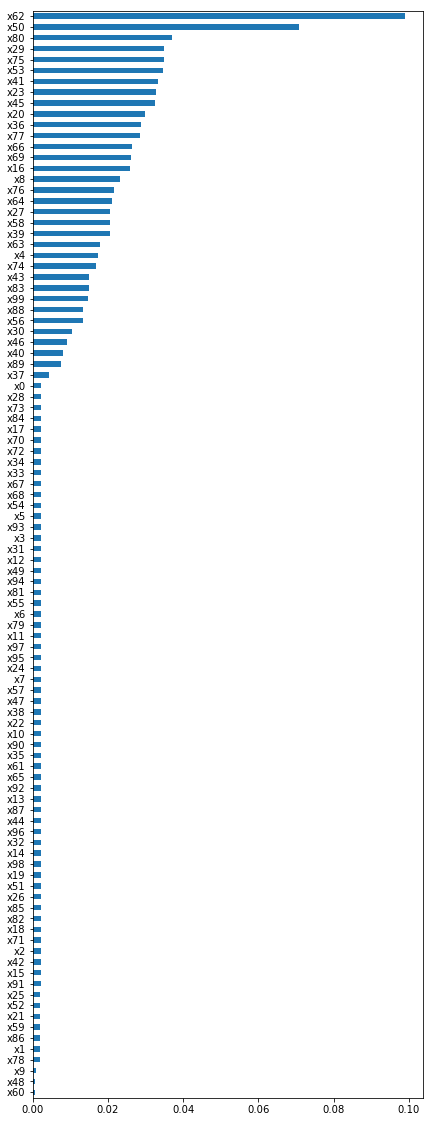

In [33]:
#Graph feature importance in descending order.
feature_importances = pd.Series(rfr.feature_importances_, index=X.columns)
feature_importances.sort_values(inplace=True)
feature_importances.plot(kind="barh", figsize=(7,20));

#### There are several attributes with low feature importance
+ Create a function to remove low importance attributes.
+ Several splits were tested.
+ Only the final split was implemented for this report.

In [34]:
#Create function which drops low importance atrributes.
def drop_attributes(df):
    A = pd.DataFrame()
    A = df[['x62','x50','x41','x20','x80','x45','x53','x36','x29','x75','x66','x69','x77','x16','x8','x23','x43','x76',
            'x39','x27','x63','x64','x4','x74','x58','x88','x30','x83','x56','x40','x99','x89','x37','x46']]
    return A

#Create data set without low importance attributes.
X_da =  drop_attributes(X)

#### Check classifier AUC score with 3-Fold cross-validation for data set after dropping attributes

In [35]:
#Obtain 3-Fold cross-validation mean score.
rfr_scores = cross_val_score(rfr, X_da, y, cv=3, scoring="roc_auc")
print("AUC:",rfr_scores.mean())

AUC: 0.984687218257


#### This is an increase in the AUC when compared with the entire data set. The data set with low importance attributes removed will be used to tune and fit the classifier.
+ AUC with all attributes: 0.9799
+ AUC with low importace attributes removed: 0.9847

<hr style="height:1px">
### Tuning RFR Classifier
+ Using GridSearchCV on such a large data set caused the computer to timeout.
+ GridSearchCV was used on individual parameters.
    - This also took very long.
    - After going through each parameter individually, the classifier was tested. 
    - It was found that as some of the parameters changed, it effected the optimization value of previously optimized parameters.
    - Certain parameters were not longer optimized.
    - Some intuitive adjustments were made by hand.
    - Tuning by hand began to yeild better results than indiviually tuning each parameter with GridSearchCV.
+ The classifier was tuned by hand with 3-Fold cross-validation.
+ This process of tuning and testing took place over two weeks.
+ Some of the tuning was performed on the test set and submitted to kaggle.
+ Several combinations for n_estimators, max_depth, criterion, bootstrap, min_samples_split, min_samples_leaf and max_features were tried.
     - n_estmators: 100, 500, 700, 1000
     - max_depth: 30, 35, 40, 50, None
     - criterion: 'mse', 'mae'
     - bootstrap: True, False
     - min_samples_split: 2, 3, 5, 7
     - min_samples_leaf: 1, 2, 3, 5
     - max_features: 'auto', 'sqrt', .2, None


+ The following configuration gave me the best result when submitted to Kaggle:
       (bootstrap=False, criterion='mse', max_depth=35,
        max_features='sqrt', max_leaf_nodes=None,
        min_impurity_split=1e-07, min_samples_leaf=1,
        min_samples_split=3, min_weight_fraction_leaf=0.0,
        n_estimators=1000, n_jobs=-1, oob_score=False, random_state=42,
        verbose=0, warm_start=False)
           
+ With all the trials included in the project, it was long, messy and unorganized.
+ Only the implementation of the classifier with the best score on kaggle has been included for brevity and organizational purposes.

### Classifier with best performance
+ AUC: 0.9924
+ This was the 6th submission to kaggle

In [36]:
#Submission #6 classifier.
rfr.set_params(bootstrap=False, max_depth=35, max_features='sqrt', n_estimators=1000)

RandomForestRegressor(bootstrap=False, criterion='mse', max_depth=35,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=1000, n_jobs=-1, oob_score=False, random_state=42,
           verbose=0, warm_start=False)

In [37]:
#Obtain 3-Fold cross-validation mean score.
rfr_scores = cross_val_score(rfr, X_da, y, cv=3, scoring="roc_auc")
print("AUC:",rfr_scores.mean())

AUC: 0.992416527215


<hr style="height:3px">
### Data Prep for Test Set

#### Check for missing values in the categorical variables of the test set

In [39]:
print(X_test['x9'].isnull().sum())
print(X_test['x46'].isnull().sum())
print(X_test['x48'].isnull().sum())
print(X_test['x60'].isnull().sum())
print(X_test['x77'].isnull().sum())

4
2
1
2
3


#### Fill missing values and convert to numeric for categorical variables
+ Missing values will be replaced with the mode for true categorical attributes.
+ Attributes that are cast to floats will have the mean used for missing values.

In [40]:
#Fill missing values with 'Jun' (June) and map to numerical values.
X_test['x9'].fillna('Jun', inplace=True)
X_test['x9'] = X_test['x9'].map({'January':0, 'Feb':1, 'Mar':2, 'Apr':3, 'May':4, 'Jun':5, 'July':6, 'Aug':7, 'sept.':8, 'Oct':9, 'Nov':10, 'Dec':11})

#Fill values with 'wednesday' and map to numberical values.
X_test.x46.fillna('wednesday', inplace=True)
X_test['x46'] = X_test['x46'].map({'monday':0, 'tuesday':1, 'wednesday':2, 'thurday':3, 'friday':4})

#Fill values with 'asia' and map to numerical.
X_test.x48.fillna('asia', inplace=True)
X_test['x48'] = X_test['x48'].map({'euorpe':0, 'asia':1, 'america':2})

#Drop the % from the variable, cast to float, the variable mean will be used for missing values.
X_test['x60'] = X_test['x60'].replace('[\%]', '', regex=True).astype(float)

#Drop the $ from the variable, cast to float, the variable mean will be used for missing values.
X_test['x77'] = X_test['x77'].replace('[\$,]', '', regex=True).astype(float)

#### Fill missing values with attribute mean and drop attributes with low importance

In [41]:
#Fill missing attributes with attribute mean.
X_test.fillna(X_test.mean(), inplace=True)

#Drop features with low importance.
X_test_da = drop_attributes(X_test)

<hr style="height:3px">
### Fit the test data to the model, predict the test set and create csv file for Kaggle submission
+ Several classifiers were tested with kaggle. 
+ The classifier with the highest AUC submitted to kaggle is below.
+ Others were ommited for brevity and organization.
+ This was the 6th submission to kaggle
+ The kaggle AUC score was 0.99157

In [42]:
#Fit training data.
rfr.fit(X_da, y)

RandomForestRegressor(bootstrap=False, criterion='mse', max_depth=35,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=1000, n_jobs=-1, oob_score=False, random_state=42,
           verbose=0, warm_start=False)

In [43]:
#Use the classifier to predict the test set.
mts = pd.DataFrame({'y': rfr.predict(X_test_da) })

#Create csv to submit to kaggle.
mts.to_csv("mts6.csv", index=True)

<hr style="height:5px">